<a href="https://colab.research.google.com/github/NguyenGiaDatt20104004/Nguyen-Gia-Dat-20104004/blob/main/MoneyVNCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset_TienVN/Train', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 1430 images belonging to 11 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset_TienVN/Test', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 220 images belonging to 11 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'100000VNĐ': 0,
 '10000VNĐ': 1,
 '1000VNĐ': 2,
 '200000VNĐ': 3,
 '20000VNĐ': 4,
 '2000VNĐ': 5,
 '200VNĐ': 6,
 '500000VNĐ': 7,
 '50000VNĐ': 8,
 '5000VNĐ': 9,
 '500VNĐ': 10}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
test_set.class_indices

{'100000VNĐ': 0,
 '10000VNĐ': 1,
 '1000VNĐ': 2,
 '200000VNĐ': 3,
 '20000VNĐ': 4,
 '2000VNĐ': 5,
 '200VNĐ': 6,
 '500000VNĐ': 7,
 '50000VNĐ': 8,
 '5000VNĐ': 9,
 '500VNĐ': 10}

In [ ]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(1430, 128, 128, 3)
(1430, 11)


In [ ]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(220, 128, 128, 3)
(220, 11)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
23/23 [==============================] - 52s 2s/step - loss: 2.4172 - accuracy: 0.0776
Epoch 2/100
23/23 [==============================] - 53s 2s/step - loss: 2.3980 - accuracy: 0.0965
Epoch 3/100
23/23 [==============================] - 51s 2s/step - loss: 2.3988 - accuracy: 0.0965
Epoch 4/100
23/23 [==============================] - 50s 2s/step - loss: 2.3970 - accuracy: 0.1084
Epoch 5/100
23/23 [==============================] - 50s 2s/step - loss: 2.3803 - accuracy: 0.1322
Epoch 6/100
23/23 [==============================] - 50s 2s/step - loss: 2.3273 - accuracy: 0.1741
Epoch 7/100
23/23 [==============================] - 50s 2s/step - loss: 2.1872 - accuracy: 0.2322
Epoch 8/100
23/23 [==============================] - 50s 2s/step - loss: 1.9221 - accuracy: 0.3448
Epoch 9/100
23/23 [==============================] - 50s 2s/step - loss: 1.5294 - accuracy: 0.4972
Epoch 10/100
23/23 [==============================] - 51s 2s/step - loss: 0.9852 - accuracy: 0.6769
Epoch 11/

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=2)
print('Sai số: ', Score[0])
print('Độ chính xác: ', Score[1])

45/45 - 26s - loss: 1.3217e-05 - accuracy: 1.0000 - 26s/epoch - 586ms/step
Sai số:  1.3217299965617713e-05
Độ chính xác:  1.0


<function matplotlib.pyplot.show(*args, **kw)>

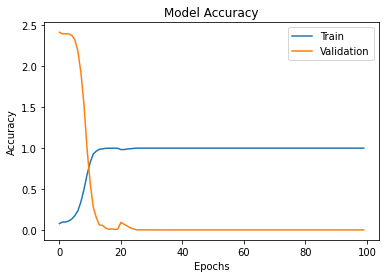

In [ ]:
# Vẽ đồ thị giữa sai số (Loss) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Nhan_dien_MoneyVN_CNN.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model("/content/drive/My Drive/Colab Notebooks/dataset_TienVN/Nhan_dien_MoneyVN_CNN.h5")

In [ ]:
class_names = ["100000VNĐ", "10000VNĐ", "1000VNĐ", "200000VNĐ", "20000VNĐ",
               "2000VNĐ", "200VNĐ", "500000VNĐ", "50000VNĐ", "5000VNĐ", "500VNĐ"]

1/1 [==============================] - 0s 32ms/step
[[2.1222310e-11 5.3596073e-06 3.4984379e-05 8.0091966e-12 6.0673973e-09
  4.4732914e-08 7.4502022e-04 1.1124832e-17 8.0414554e-18 9.9706095e-01
  2.1536094e-03]]
Kết quả:  5000VNĐ
Độ chính xác:  0.99706095


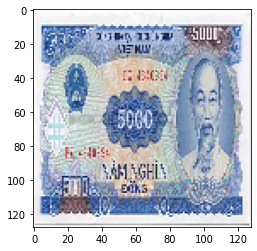

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/My Drive/Colab Notebooks/dataset_TienVN/Check/5k_2.jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 36ms/step
[[6.2727880e-01 1.6172919e-02 6.2498245e-08 7.3067017e-06 1.0746108e-07
  1.2035932e-03 2.1872392e-01 1.0208384e-05 1.0345486e-05 1.0353462e-01
  3.3058025e-02]]
Kết quả:  100000VNĐ
Độ chính xác:  0.6272788


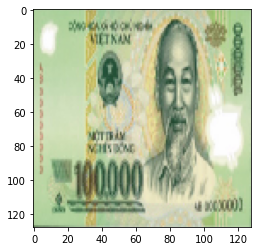

In [ ]:
url1 = "/content/drive/My Drive/Colab Notebooks/dataset_TienVN/Check/100k.jpg"
img = load_img(url1, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)